<a href="https://colab.research.google.com/github/kellischeuble/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



In [0]:
# 8% false positive rate 
p_pos_sober = .08
# 100% true positive rate
p_pos_drunk = 1.0
# prior belief about drunk driving in the population is 1/1000
p_drunk = 1/1000
# complement probability of p_drunk (1 - p_drunk)
p_sober = 1 - p_drunk

def prob_drunk_given_positive(prob_drunk_prior, 
                              false_positive_rate, 
                              true_positive_rate):
  posterior_probability = (true_positive_rate * prob_drunk_prior) / ((true_positive_rate * prob_drunk_prior) + (false_positive_rate * (1-prob_drunk_prior)))
  return posterior_probability

In [0]:
# for loop to loop over the number of positive tests

x = 0

while p_drunk <= .95:
  # change the probability of them being drunk based on what we get from
  # their positive test result
  p_drunk = prob_drunk_given_positive(p_drunk, p_pos_sober, p_pos_drunk)
  print ("possibility of person being drunk after {} positive tests: {}%".format(
    x, p_drunk*100))
  x += 1
  


possibility of person being drunk after 0 positive tests: 1.2357884330202669%
possibility of person being drunk after 1 positive tests: 13.525210993291495%
possibility of person being drunk after 2 positive tests: 66.15996951348605%
possibility of person being drunk after 3 positive tests: 96.06895076105054%


In [0]:
# 2

In [0]:
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
random_data = [5,3,2,3,6,2,1,3,2]
mean, var, std = stats.bayes_mvs(random_data)

def print_values(mean, var, std):
  print("mean:", mean)
  print("variance:", var)
  print("standard deviation:", std)

print_values(mean, var, std)

mean: Mean(statistic=3.0, minmax=(2.0199321304885935, 3.980067869511406))
variance: Variance(statistic=3.333333333333333, minmax=(1.2897140805727942, 7.3189382678208705))
standard deviation: Std_dev(statistic=1.751559755124353, minmax=(1.1356557931753768, 2.705353630825529))


In [0]:
# scipy.stats.bayes_mvs is cool because it gives you a min and max value for each value...

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# look at age column...

age = df['age']

# look at values using scipy.stats.bayes_mvs:
mean_age, var_age, std_age = stats.bayes_mvs(age)
print_values(mean_age, var_age, std_age)

mean: Mean(statistic=38.58164675532078, minmax=(38.45730990459461, 38.705983606046956))
variance: Variance(statistic=186.05568600783081, minmax=(183.65720472095407, 188.45416729470756))
standard deviation: Std_dev(statistic=13.640223092304275, minmax=(13.552303662004416, 13.728142522604134))


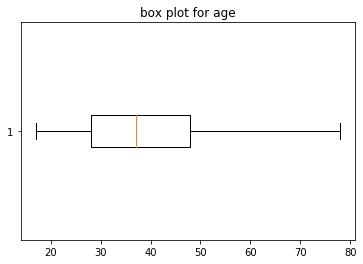

In [0]:
fig1, ax1 = plt.subplots()
ax1.set_title('box plot for age')
ax1.boxplot(df['age'], showfliers=False, vert=False);

In [0]:
plt.errorbar

In [0]:
# 3

The difference between Bayesian Statististics and Frequentist Statistics is that the former allows us to take other factors, or prior knowledge, into account when calculating the likeleness of something to happen.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!